In [1]:
import pandas as pd
from simulation_para import square_length, bandwidth
from _utils import plot_cdf_pdf, calculate_area_throughput, calculate_and_rank_percentiles, generate_colorbar_ticks, duration_benchmarking, plot_sinr_heatmaps

In [2]:
# Results location
algo_name = "SAC"
optim_name = "SGD"
results_dir = 'RESULTS'
results_folder = f'{algo_name}-{optim_name}'

# Spectral Efficiencies

In [3]:
MODEL_DELTA_SINR_SEs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SEs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SEs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SEs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SEs.csv', index_col=0)
MODEL_RELATIVE_SINR_SEs          = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SEs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SEs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SEs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

MAXMIN_SEs  = pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SEs.csv', index_col=0)
MAXPROD_SEs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SEs.csv', index_col=0)
SUMRATE_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SEs.csv', index_col=0)

In [4]:
SE_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SEs':             {'label': 'DRL [DELTA SINR]',                       'data': MODEL_DELTA_SINR_SEs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SEs':    {'label': 'DRL [EXP DELTA SINR]',                   'data': MODEL_EXP_DELTA_CLIP_SINR_SEs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SEs':         {'label': 'DRL [LOG DELTA SINR]',                   'data': MODEL_LOG_DELTA_SINR_SEs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SEs':          {'label': 'DRL [RELATIVE SINR]',                    'data': MODEL_RELATIVE_SINR_SEs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SEs': {'label': 'DRL [EXP RELATIVE SINR]',                'data': MODEL_EXP_RELATIVE_CLIP_SINR_SEs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SEs':      {'label': 'DRL [LOG RELATIVE SINR]',                'data': MODEL_LOG_RELATIVE_SINR_SEs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SEs':                       {'label': 'MAX-MIN',                                'data': MAXMIN_SEs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SEs':                      {'label': 'MAX-PROD',                               'data': MAXPROD_SEs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SEs':                      {'label': 'MAX-SUM-RATE',                           'data': SUMRATE_SEs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

## Spectral Efficiencies

### Mean Spectral Efficiencies

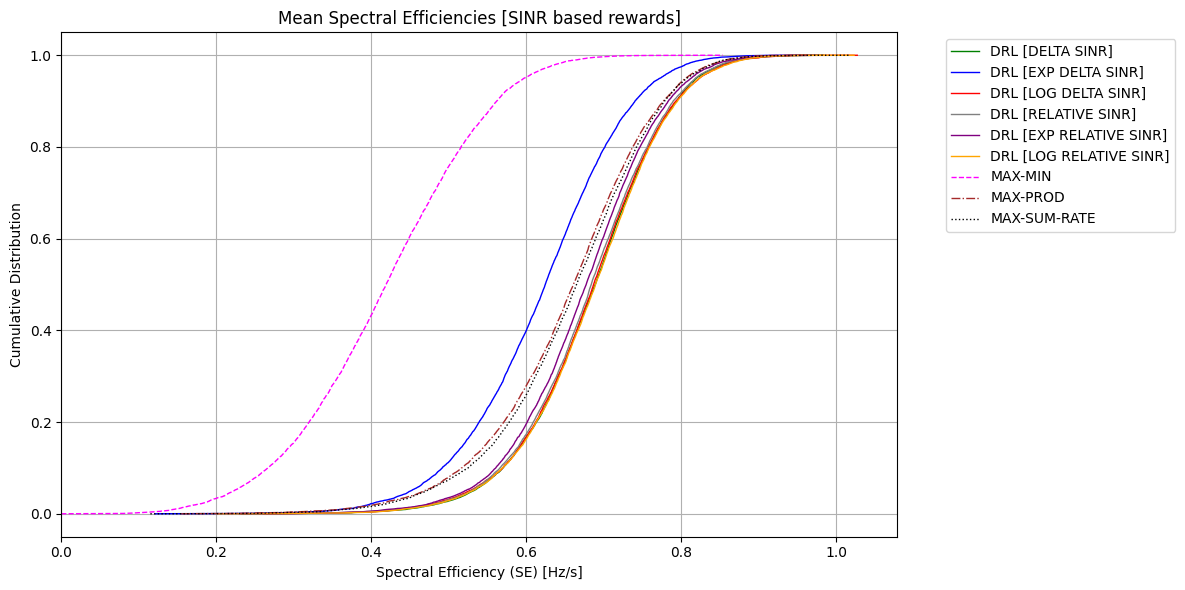

In [5]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Mean Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=True, save_plt=False, save_path='figures', xmin=0)

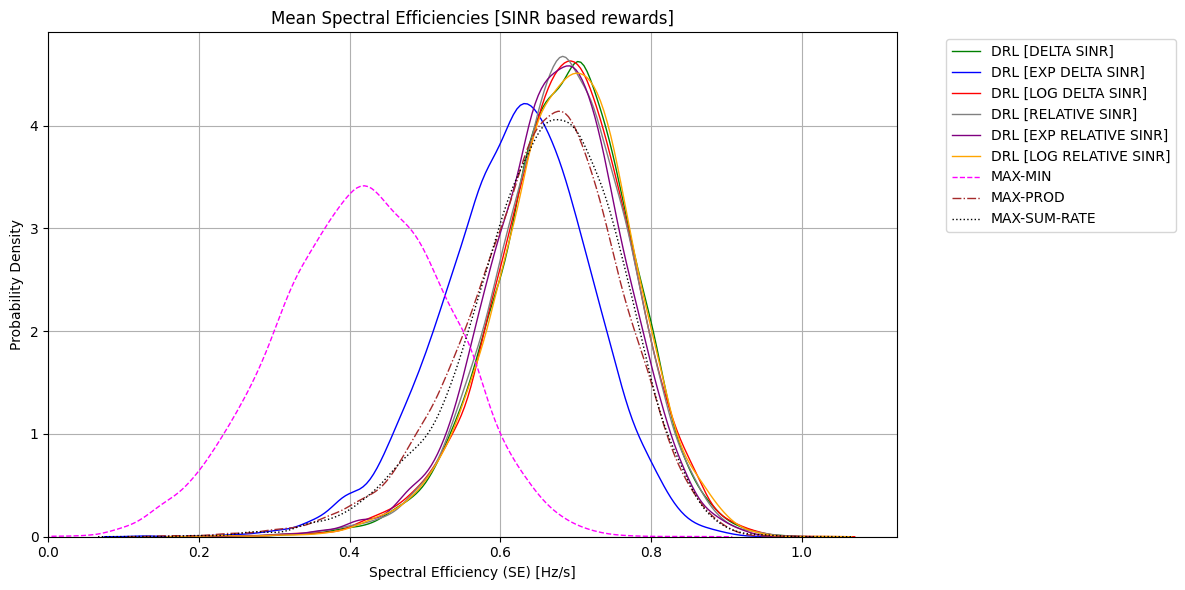

In [6]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Mean Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='mean', cumulative=False, save_plt=False, save_path='figures', xmin=0)

### Min Spectral Efficiencies

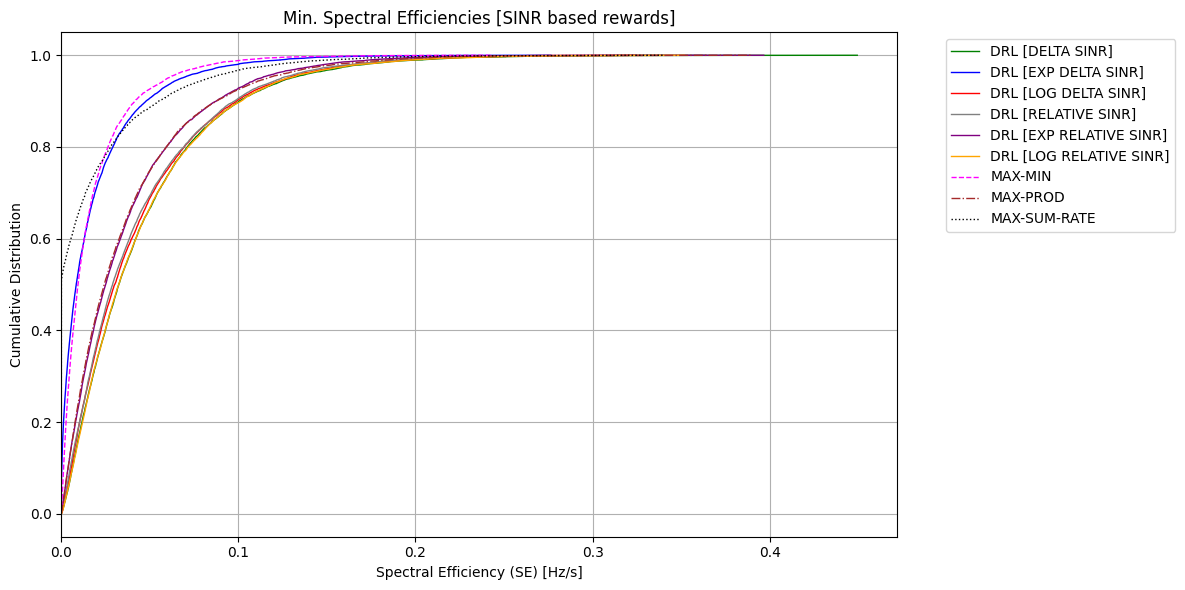

In [7]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Min. Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=True, save_plt=False, save_path='figures', xmin=0)

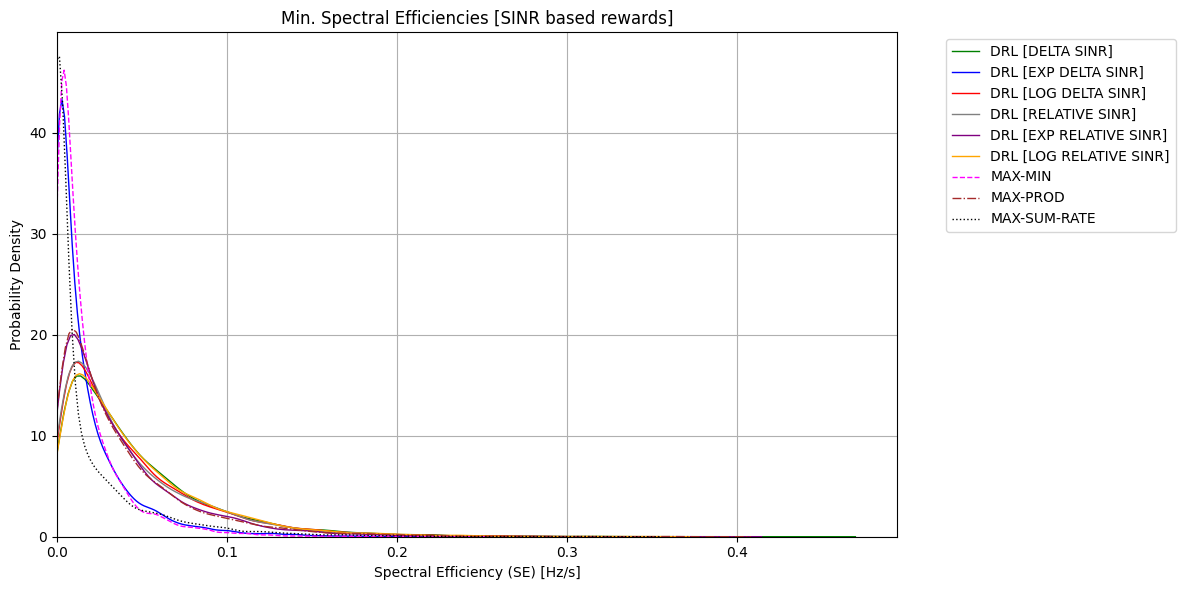

In [8]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Min. Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='min', cumulative=False, save_plt=False, save_path='figures', xmin=0)

### Max Spectral Efficiencies

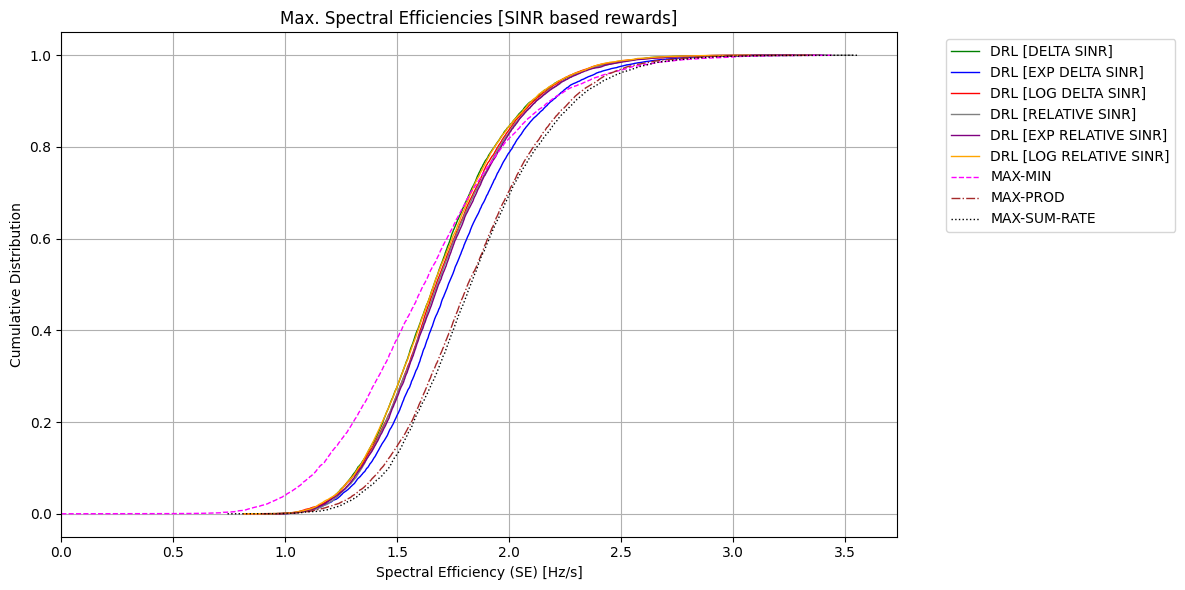

In [9]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Max. Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=True, save_plt=False, save_path='figures', xmin=0)

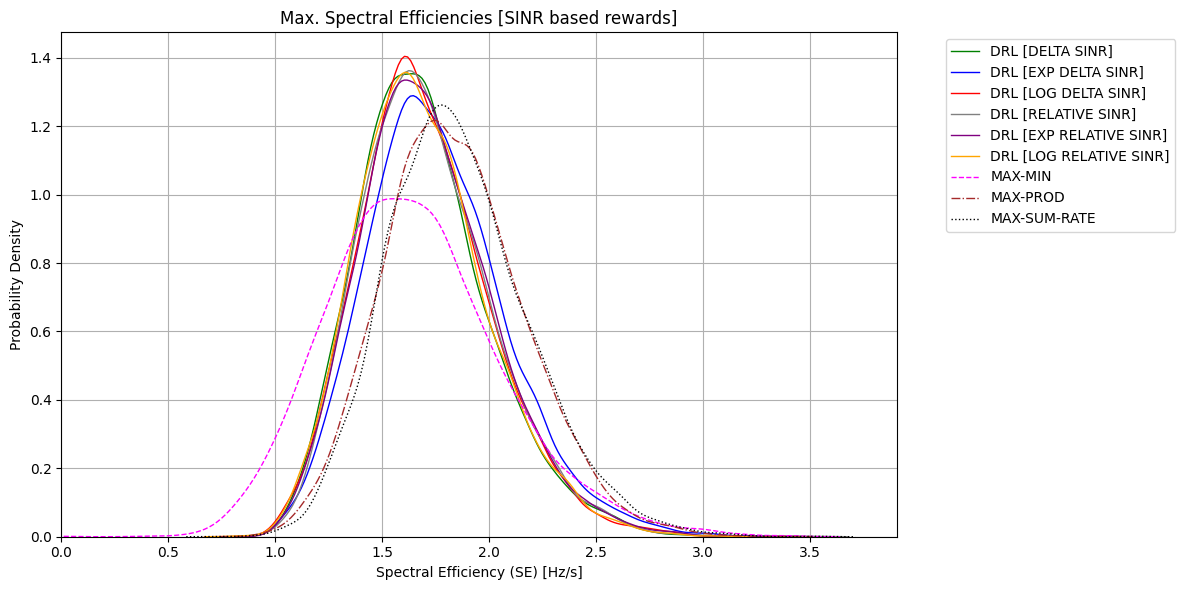

In [10]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Max. Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='max', cumulative=False, save_plt=False, save_path='figures', xmin=0)

### Sum Spectral Efficiencies

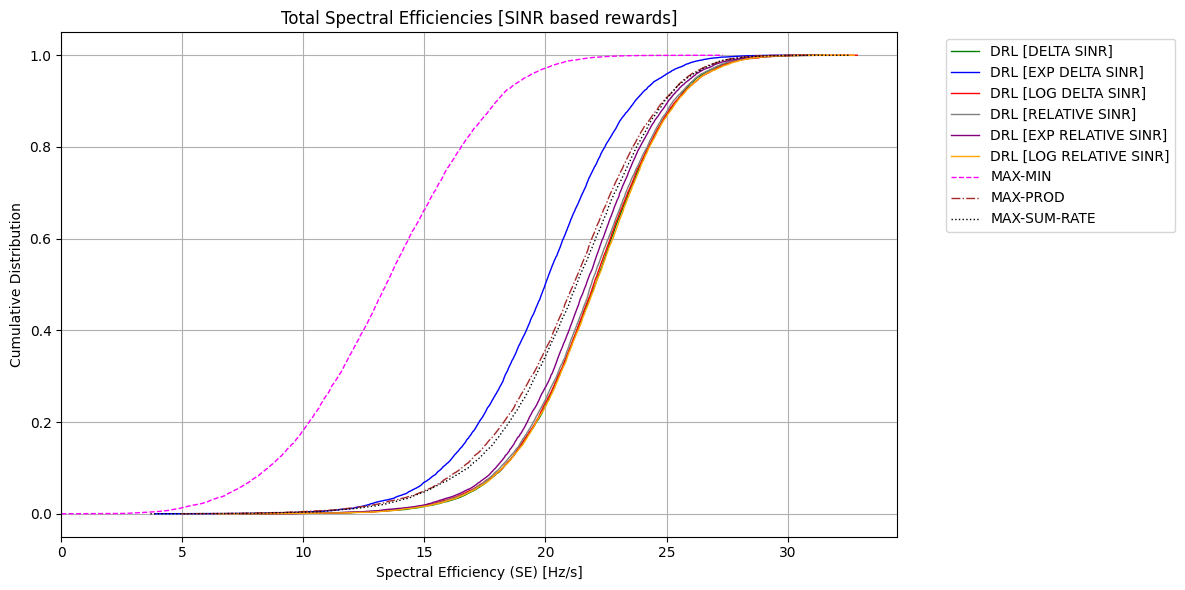

In [11]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Total Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=True, save_plt=False, save_path='figures', xmin=0)

In [12]:
calculate_and_rank_percentiles(SE_DATA_R_SINR, [100], operation='sum')

,Model,100th Percentile,Rank
2,DRL [LOG DELTA SINR],32.876784,1
5,DRL [LOG RELATIVE SINR],32.747781,2
8,MAX-SUM-RATE,32.588020,3
0,DRL [DELTA SINR],31.486918,4
3,DRL [RELATIVE SINR],31.233839,5
4,DRL [EXP RELATIVE SINR],31.204858,6
7,MAX-PROD,30.906743,7
1,DRL [EXP DELTA SINR],30.444872,8
6,MAX-MIN,27.323673,9


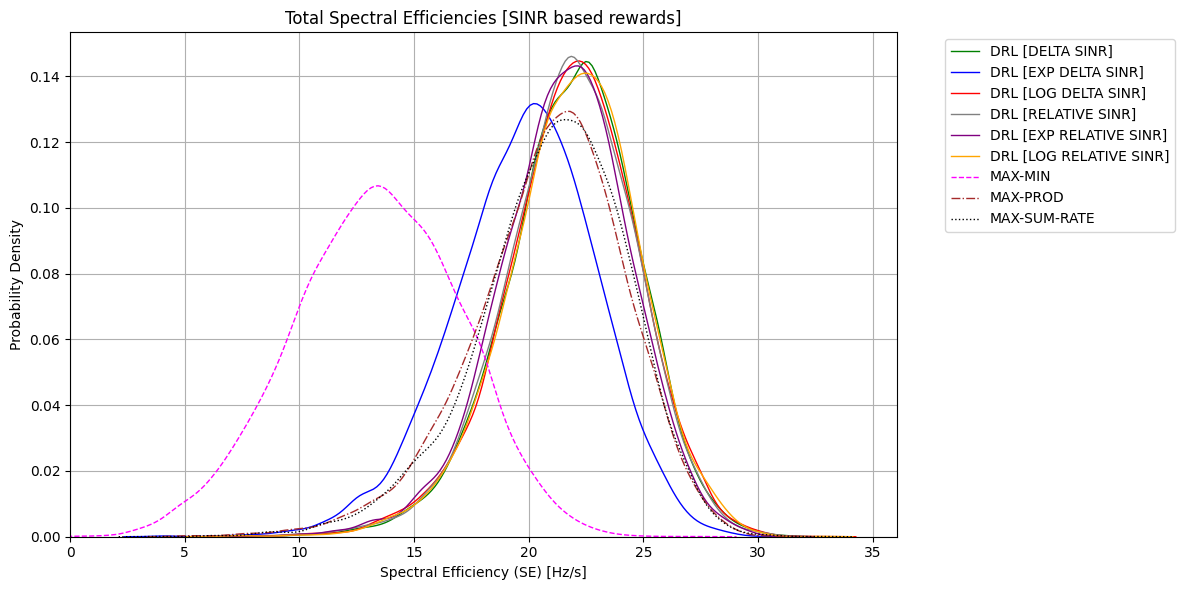

In [13]:
plot_cdf_pdf(data=SE_DATA_R_SINR, title='Total Spectral Efficiencies [SINR based rewards]', xlabel='Spectral Efficiency (SE) [Hz/s]', operation='sum', cumulative=False, save_plt=False, save_path='figures', xmin=0)

# Area Throughput

In [14]:
MODEL_DELTA_SINR_ATHP             = calculate_area_throughput(MODEL_DELTA_SINR_SEs            , bandwidth, square_length, 'numpy')
MODEL_EXP_DELTA_CLIP_SINR_ATHP    = calculate_area_throughput(MODEL_EXP_DELTA_CLIP_SINR_SEs   , bandwidth, square_length, 'numpy')
MODEL_LOG_DELTA_SINR_ATHP         = calculate_area_throughput(MODEL_LOG_DELTA_SINR_SEs        , bandwidth, square_length, 'numpy')
MODEL_RELATIVE_SINR_ATHP          = calculate_area_throughput(MODEL_RELATIVE_SINR_SEs         , bandwidth, square_length, 'numpy')
MODEL_EXP_RELATIVE_CLIP_SINR_ATHP = calculate_area_throughput(MODEL_EXP_RELATIVE_CLIP_SINR_SEs, bandwidth, square_length, 'numpy')
MODEL_LOG_RELATIVE_SINR_ATHP      = calculate_area_throughput(MODEL_LOG_RELATIVE_SINR_SEs     , bandwidth, square_length, 'numpy')
MAXMIN_ATHP                       = calculate_area_throughput(MAXMIN_SEs                      , bandwidth, square_length, 'numpy')
MAXPROD_ATHP                      = calculate_area_throughput(MAXPROD_SEs                     , bandwidth, square_length, 'numpy')
SUMRATE_ATHP                      = calculate_area_throughput(SUMRATE_SEs                     , bandwidth, square_length, 'numpy')

In [15]:
ATHP_DATA_R_SINR = {
    'MODEL_DELTA_SINR_ATHP':             {'label': 'DRL [DELTA SINR]',        'data': MODEL_DELTA_SINR_ATHP,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_ATHP':    {'label': 'DRL [EXP DELTA SINR]',    'data': MODEL_EXP_DELTA_CLIP_SINR_ATHP,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_v0_ATHP':      {'label': 'DRL [LOG DELTA SINR]',    'data': MODEL_LOG_DELTA_SINR_ATHP,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_ATHP':          {'label': 'DRL [RELATIVE SINR]',     'data': MODEL_RELATIVE_SINR_ATHP,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_ATHP': {'label': 'DRL [EXP RELATIVE SINR]', 'data': MODEL_EXP_RELATIVE_CLIP_SINR_ATHP,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_ATHP':      {'label': 'DRL [LOG RELATIVE SINR]', 'data': MODEL_LOG_RELATIVE_SINR_ATHP,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_ATHP':                       {'label': 'MAX-MIN',                 'data': MAXMIN_ATHP,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_ATHP':                      {'label': 'MAX-PROD',                'data': MAXPROD_ATHP,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_ATHP':                      {'label': 'MAX-SUM-RATE',            'data': SUMRATE_ATHP,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

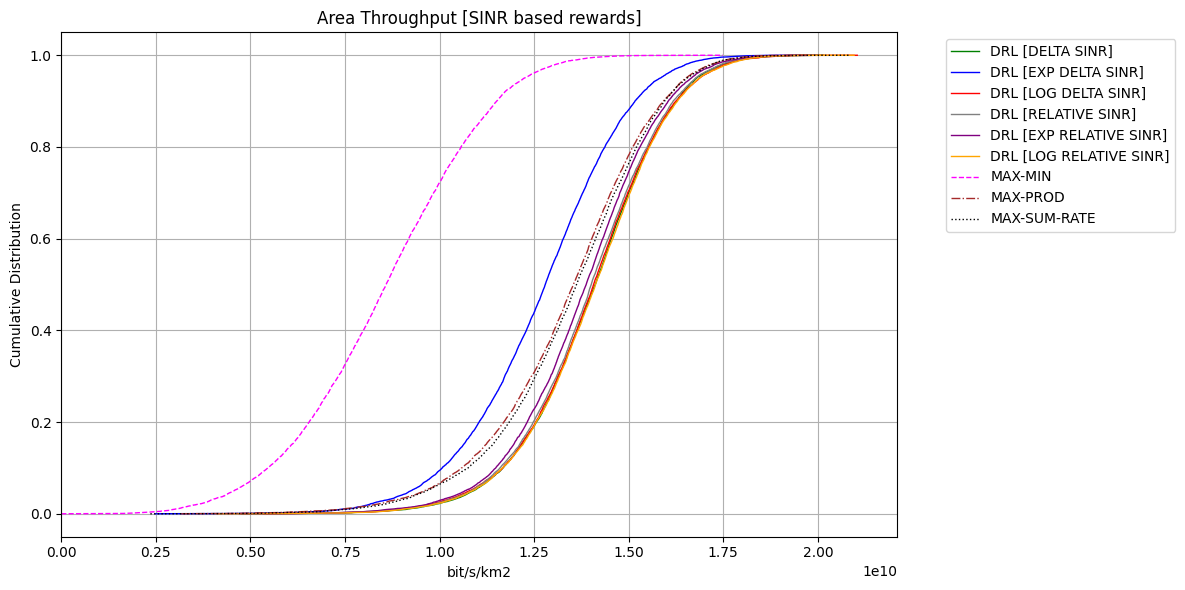

In [16]:
plot_cdf_pdf(data=ATHP_DATA_R_SINR, title='Area Throughput [SINR based rewards]', xlabel='bit/s/km2', operation=None, cumulative=True, save_plt=False, save_path='figures', xmin=0)

In [17]:
calculate_and_rank_percentiles(ATHP_DATA_R_SINR, [100], operation=None)

,Model,100th Percentile,Rank
2,DRL [LOG DELTA SINR],2.104114e+10,1
5,DRL [LOG RELATIVE SINR],2.095858e+10,2
8,MAX-SUM-RATE,2.085633e+10,3
0,DRL [DELTA SINR],2.015163e+10,4
3,DRL [RELATIVE SINR],1.998966e+10,5
4,DRL [EXP RELATIVE SINR],1.997111e+10,6
7,MAX-PROD,1.978032e+10,7
1,DRL [EXP DELTA SINR],1.948472e+10,8
6,MAX-MIN,1.748715e+10,9


In [18]:
MODEL_DELTA_SINR_POWERs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_POWERS.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_POWERs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_POWERS.csv', index_col=0)
MODEL_LOG_DELTA_SINR_POWERs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_POWERS.csv', index_col=0)
MODEL_RELATIVE_SINR_POWERs          = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_POWERS.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_POWERS.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_POWERs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_POWERS.csv', index_col=0)

MAXMIN_POWERs  = pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_POWERs.csv', index_col=0)
MAXPROD_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_POWERs.csv', index_col=0)
SUMRATE_POWERs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_POWERs.csv', index_col=0)

In [19]:
P_DATA_R_SINR = {
    'MODEL_DELTA_SINR_POWERs':             {'label': 'DRL [DELTA SINR]',         'data': MODEL_DELTA_SINR_POWERs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_POWERs':    {'label': 'DRL [EXP DELTA SINR]',     'data': MODEL_EXP_DELTA_CLIP_SINR_POWERs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_POWERs':         {'label': 'DRL [LOG DELTA SINR]',     'data': MODEL_LOG_DELTA_SINR_POWERs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_POWERs':          {'label': 'DRL [RELATIVE SINR]',      'data': MODEL_RELATIVE_SINR_POWERs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_POWERs': {'label': 'DRL [EXP RELATIVE SINR]',  'data': MODEL_EXP_RELATIVE_CLIP_SINR_POWERs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_POWERs':      {'label': 'DRL [LOG RELATIVE SINR]',  'data': MODEL_LOG_RELATIVE_SINR_POWERs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_POWERs':                       {'label': 'MAX-MIN',                  'data': MAXMIN_POWERs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_POWERs':                      {'label': 'MAX-PROD',                 'data': MAXPROD_POWERs,                        'color': 'brown',   'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_POWERs':                      {'label': 'MAX-SUM-RATE',             'data': SUMRATE_POWERs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### Uplink Power

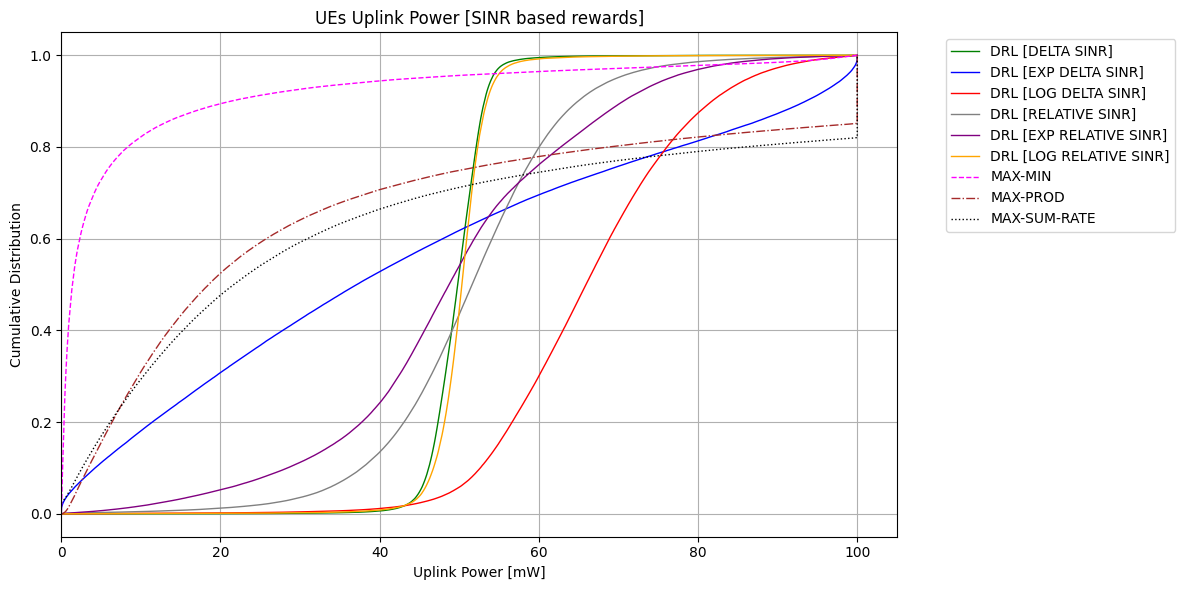

In [20]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation=None, cumulative=True, save_plt=False, save_path='figures', xmin=0)

### Mean Uplink Power

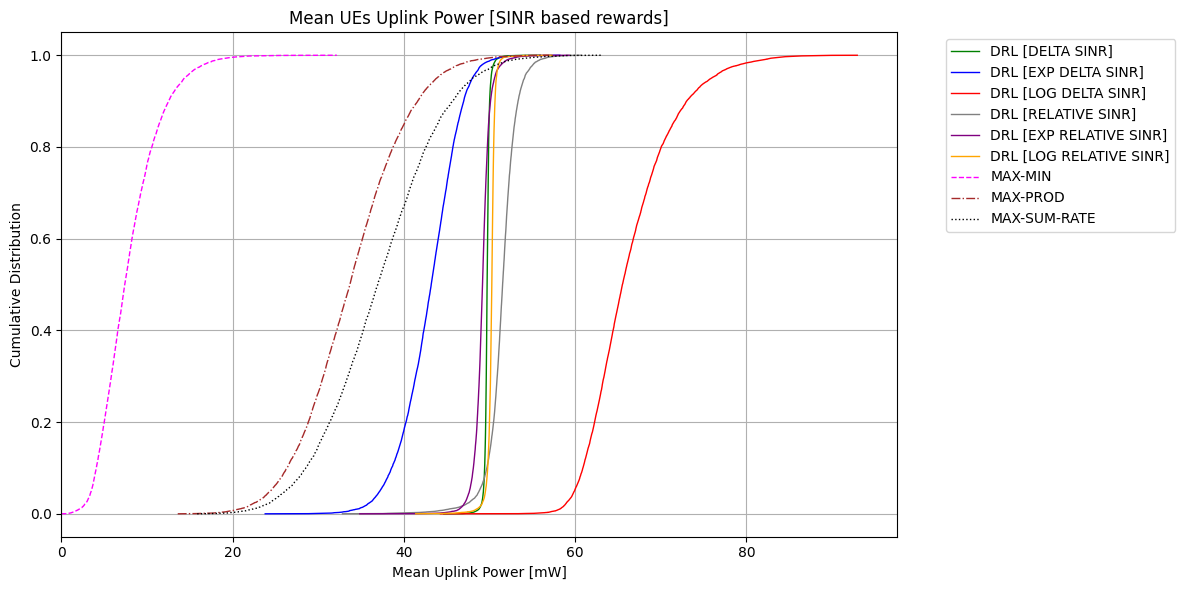

In [21]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Mean UEs Uplink Power [SINR based rewards]', xlabel='Mean Uplink Power [mW]', operation='mean', cumulative=True, save_plt=False, save_path='figures', xmin=0)

### Min Uplink Power

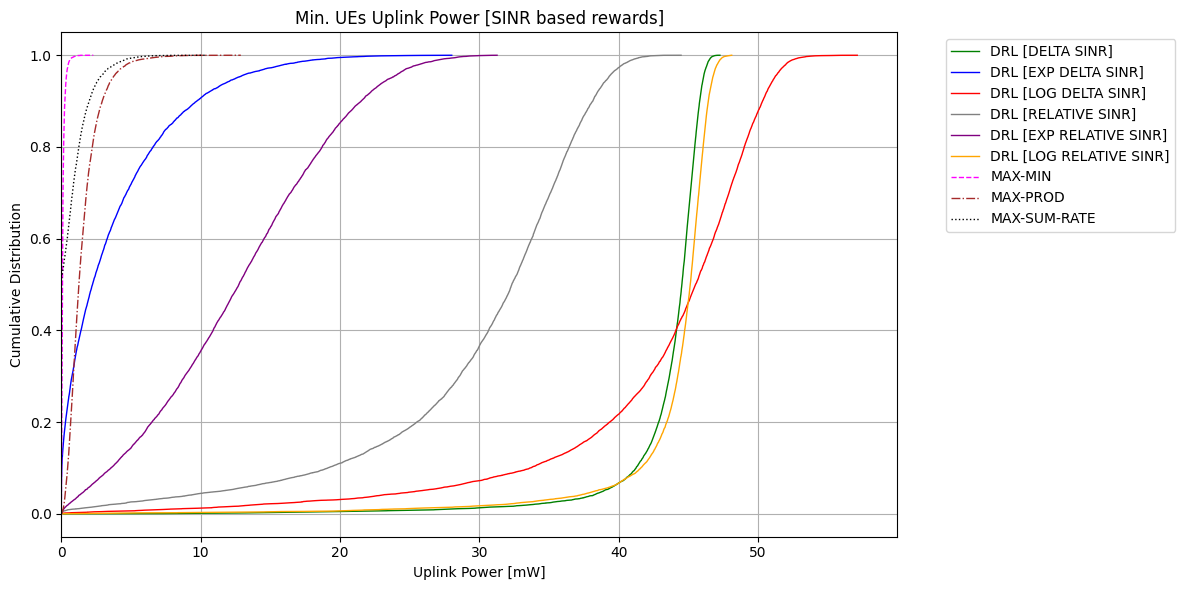

In [22]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Min. UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='min', cumulative=True, save_plt=False, save_path='figures', xmin=0)

### Max Uplink Power

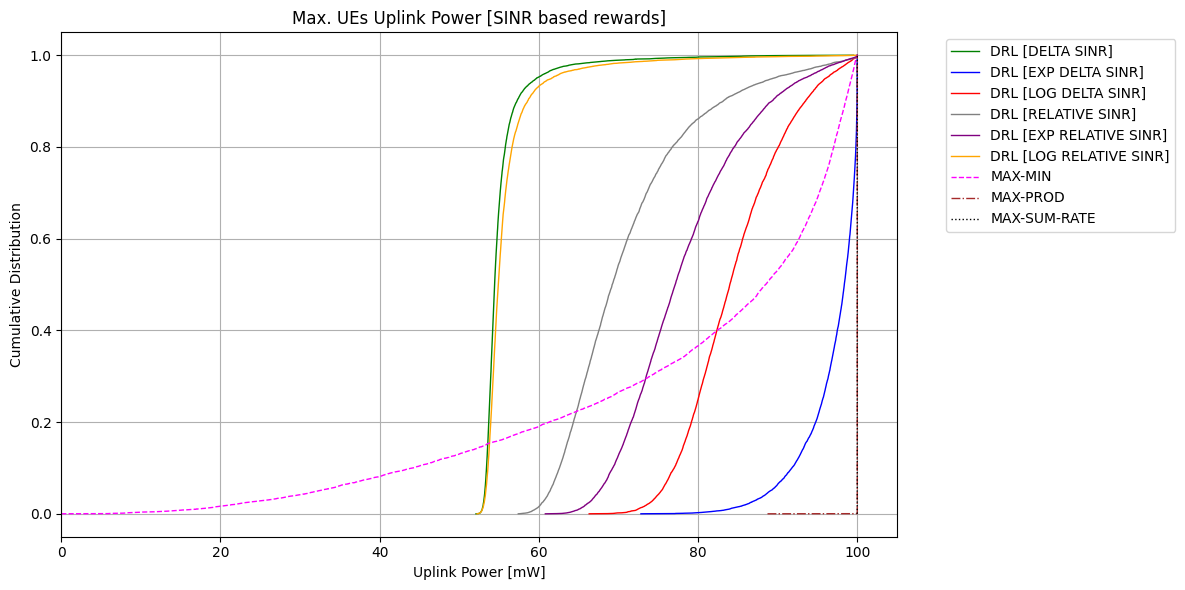

In [23]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Max. UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='max', cumulative=True, save_plt=False, save_path='figures', xmin=0)

### Sum Uplink Power

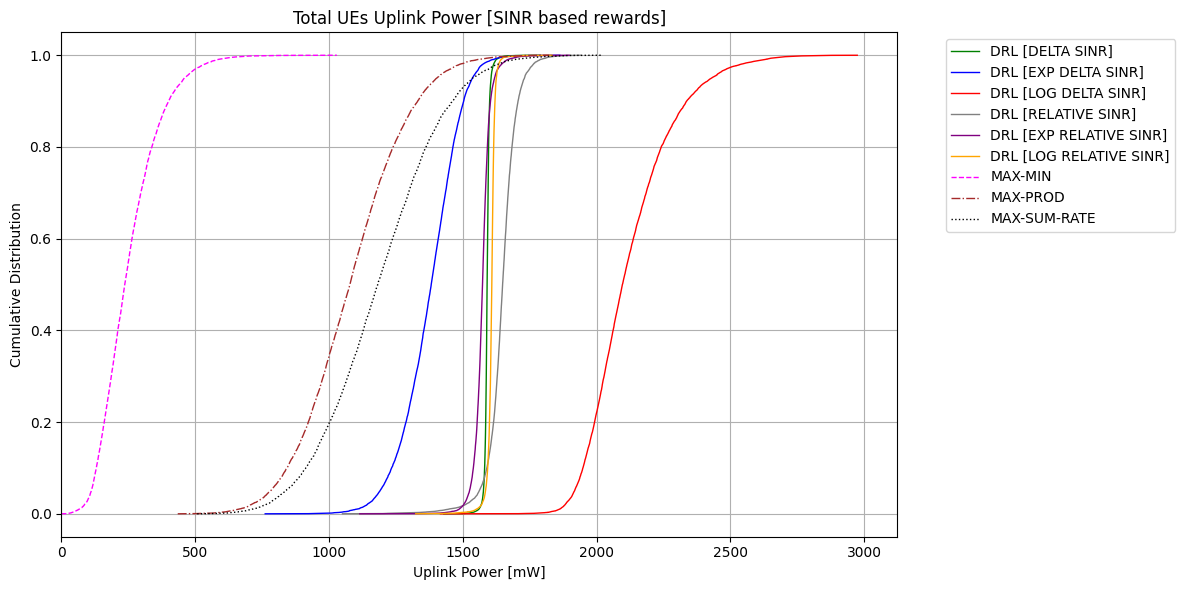

In [24]:
plot_cdf_pdf(data=P_DATA_R_SINR, title='Total UEs Uplink Power [SINR based rewards]', xlabel='Uplink Power [mW]', operation='sum', cumulative=True, save_plt=False, save_path='figures', xmin=0)

# SINR

In [25]:
MODEL_DELTA_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_RELATIVE_SINR_SINRs          = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

In [26]:
SINR_DATA_R_SINR = {
    'MODEL_DELTA_SINR_SINRs':             {'label': 'DRL [DELTA SINR]',        'data': MODEL_DELTA_SINR_SINRs,               'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_DELTA_CLIP_SINR_SINRs':    {'label': 'DRL [EXP DELTA SINR]',    'data': MODEL_EXP_DELTA_CLIP_SINR_SINRs,      'color': 'blue',    'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_DELTA_SINR_SINRs':         {'label': 'DRL [LOG DELTA SINR]',    'data': MODEL_LOG_DELTA_SINR_SINRs,           'color': 'red',     'linestyle': '-',  'linewidth': 1},
    'MODEL_RELATIVE_SINR_SINRs':          {'label': 'DRL [RELATIVE SINR]',     'data': MODEL_RELATIVE_SINR_SINRs,            'color': 'gray',    'linestyle': '-',  'linewidth': 1},
    'MODEL_EXP_RELATIVE_CLIP_SINR_SINRs': {'label': 'DRL [EXP RELATIVE SINR]', 'data': MODEL_EXP_RELATIVE_CLIP_SINR_SINRs,   'color': 'purple',  'linestyle': '-',  'linewidth': 1},
    'MODEL_LOG_RELATIVE_SINR_SINRs':      {'label': 'DRL [LOG RELATIVE SINR]', 'data': MODEL_LOG_RELATIVE_SINR_SINRs,        'color': 'orange',  'linestyle': '-',  'linewidth': 1},
    'MAXMIN_SINRs':                       {'label': 'MAX-MIN',                 'data': MAXMIN_SINRs,                         'color': 'magenta', 'linestyle': '--', 'linewidth': 1},
    'MAXPROD_SINRs':                      {'label': 'MAX-PROD',                'data': MAXPROD_SINRs,                        'color': 'yellow',  'linestyle': '-.', 'linewidth': 1},
    'SUMRATE_SINRs':                      {'label': 'MAX-SUM-RATE',            'data': SUMRATE_SINRs,                        'color': 'black',   'linestyle': ':',  'linewidth': 1},
}

### SINR

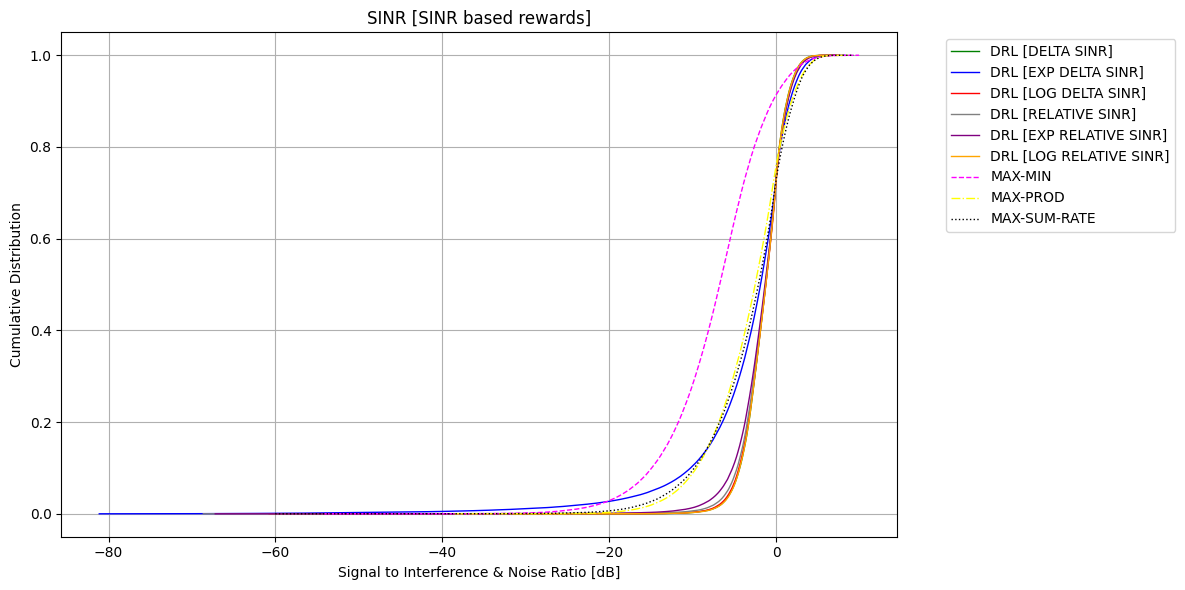

In [27]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation=None, cumulative=True, save_plt=False, save_path='figures', convert_to_db=True)

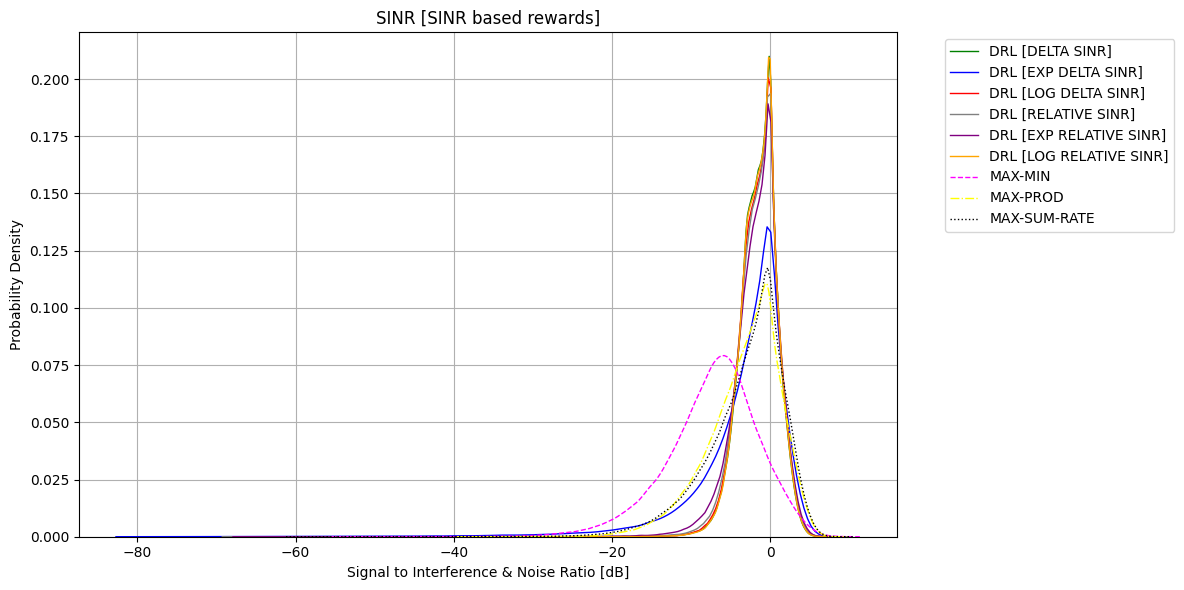

In [28]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation=None, cumulative=False, save_plt=False, save_path='figures', convert_to_db=True)

### Mean SINR

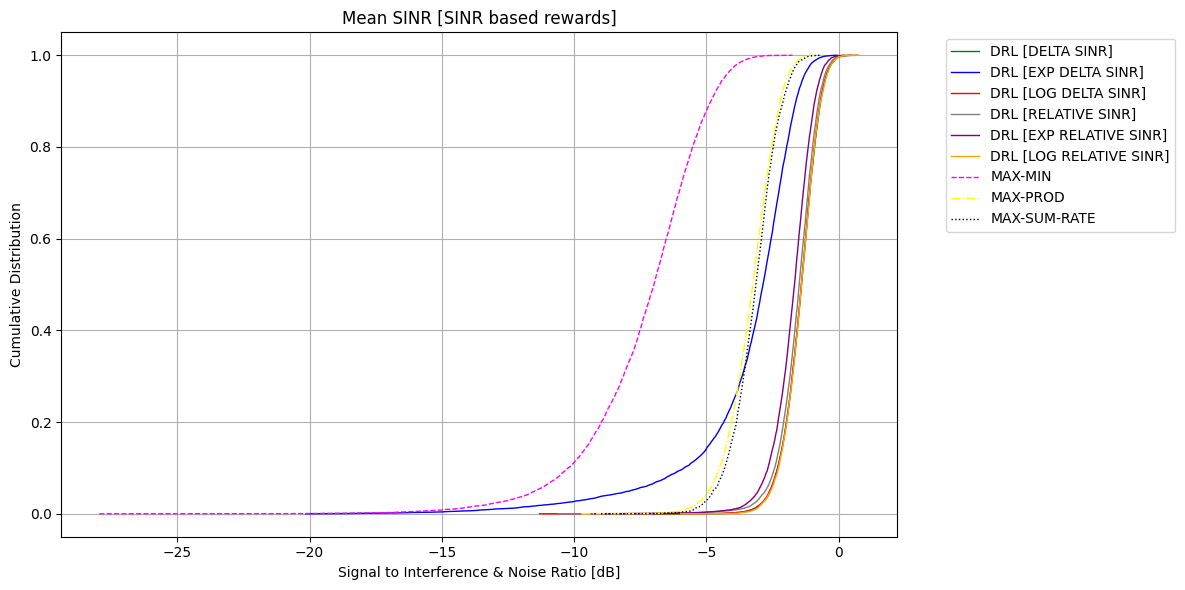

In [29]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Mean SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='mean', cumulative=True, save_plt=False, save_path='figures', convert_to_db=True)

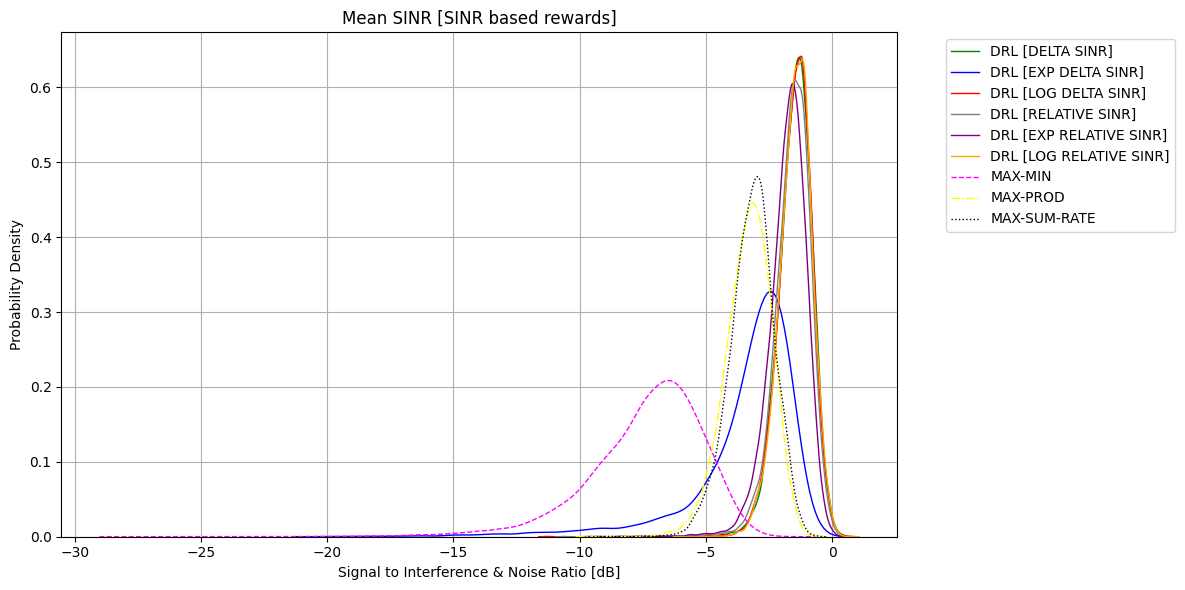

In [30]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Mean SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='mean', cumulative=False, save_plt=False, save_path='figures', convert_to_db=True)

### Min SINR

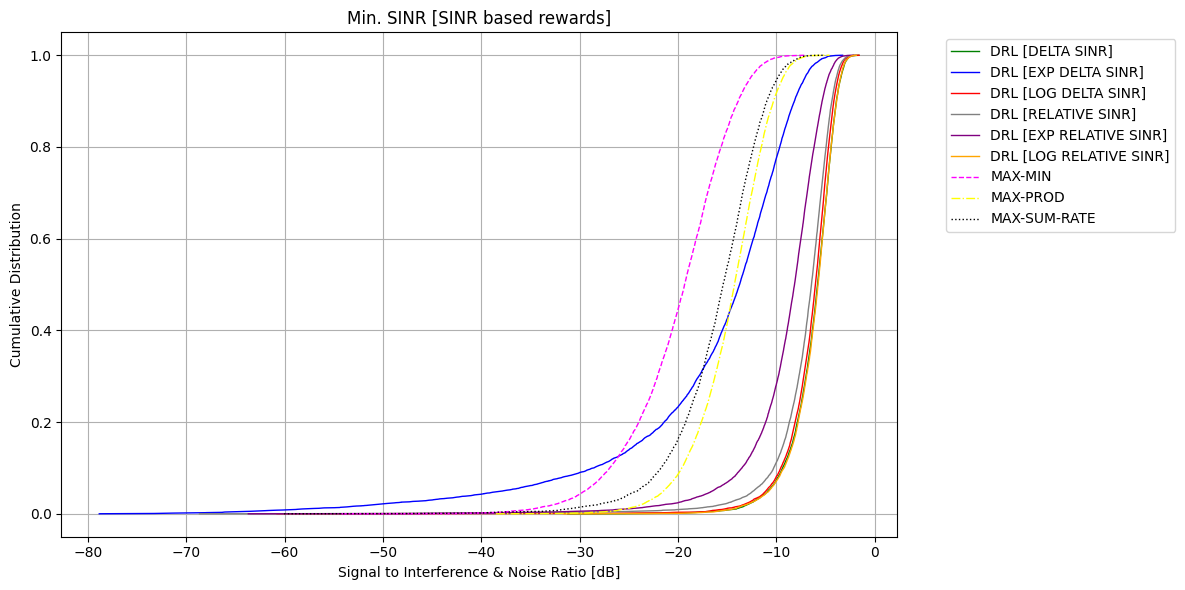

In [31]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Min. SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='min', cumulative=True, save_plt=False, save_path='figures', convert_to_db=True)

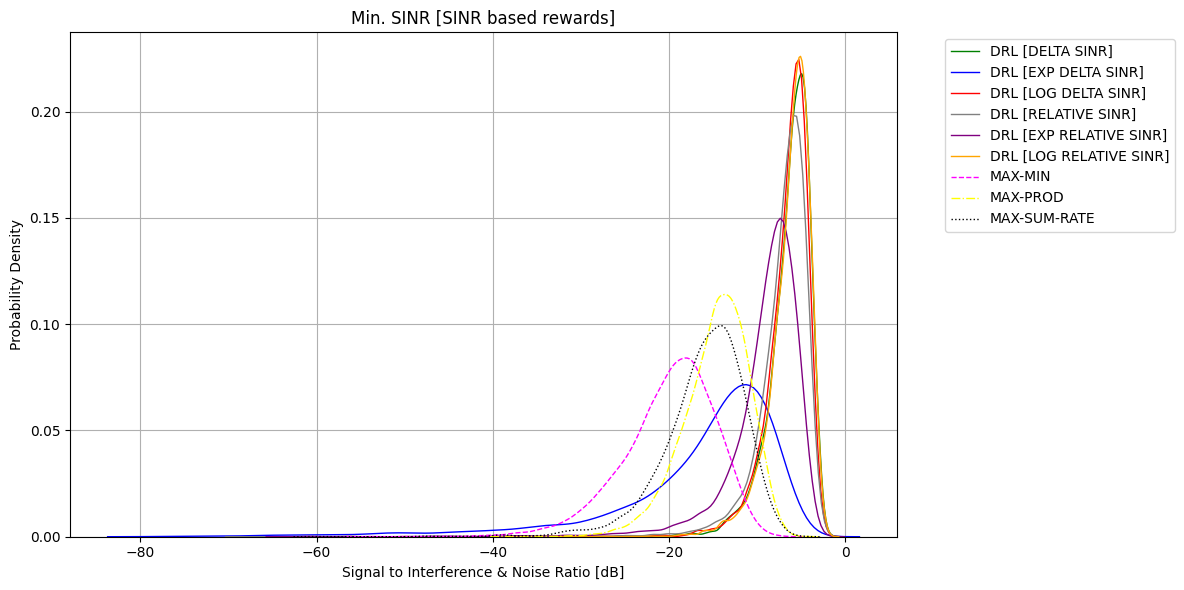

In [32]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Min. SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='min', cumulative=False, save_plt=False, save_path='figures', convert_to_db=True)

### Max SINR

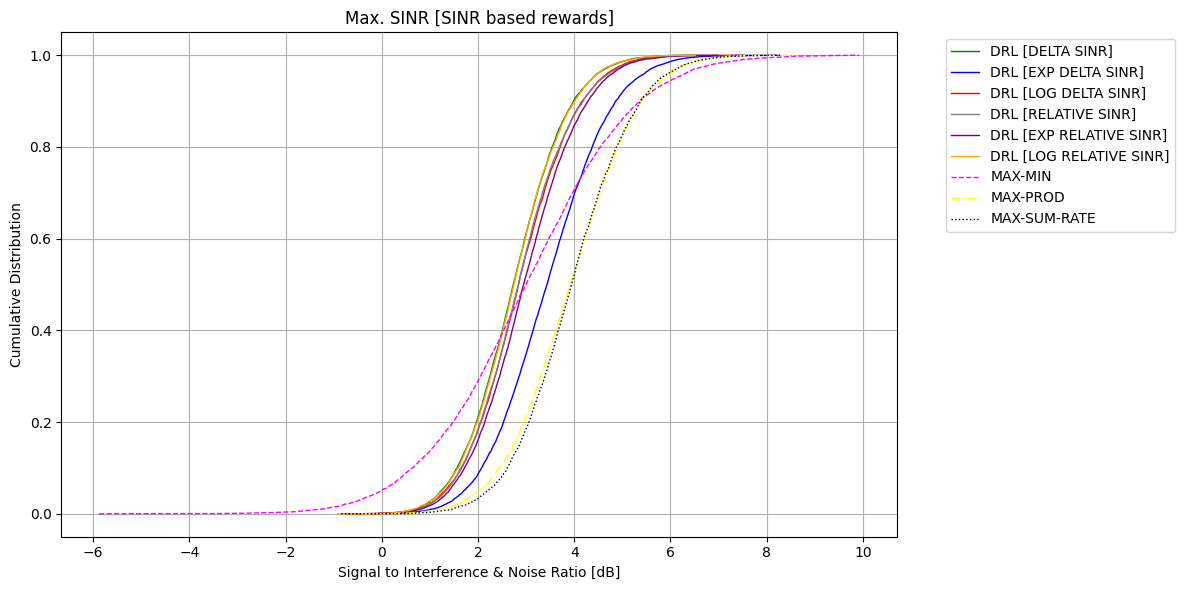

In [33]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Max. SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='max', cumulative=True, save_plt=False, save_path='figures', convert_to_db=True)

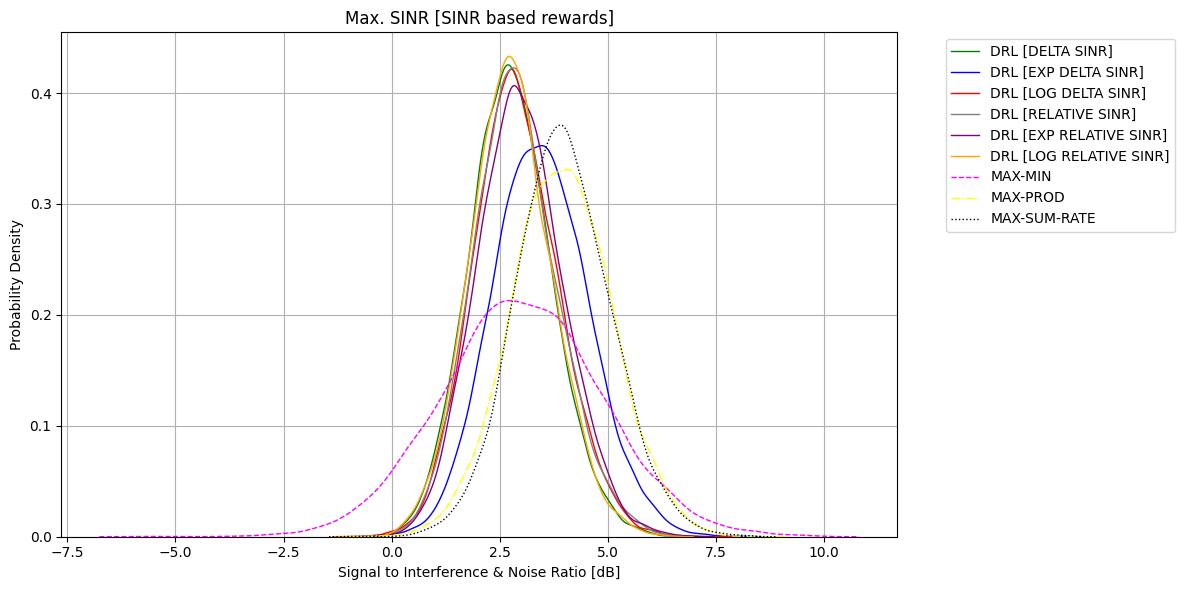

In [34]:
plot_cdf_pdf(data=SINR_DATA_R_SINR, title='Max. SINR [SINR based rewards]', xlabel='Signal to Interference & Noise Ratio [dB]', operation='max', cumulative=False, save_plt=False, save_path='figures', convert_to_db=True)

# SINR Heatmaps

In [35]:
MODEL_DELTA_SINR_SINRs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_SINRs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_SINRs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_SINRs.csv', index_col=0)
MODEL_RELATIVE_SINR_SINRs          = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_SINRs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_SINRs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_SINRs      = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_SINRs.csv', index_col=0)

MAXMIN_SINRs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_SINRs.csv', index_col=0)
MAXPROD_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_SINRs.csv', index_col=0)
SUMRATE_SINRs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_SINRs.csv', index_col=0)

UEs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/UEs_LOCATIONS.csv', index_col=0)
APs_LOCATIONS = pd.read_csv(f'{results_dir}/{results_folder}/APs_LOCATIONS.csv', index_col=0)

In [36]:
grid_size = (100, 100)

In [37]:
vmin = -40
vmax = 0
colorbar_ticks = generate_colorbar_ticks(vmin, vmax, 5)

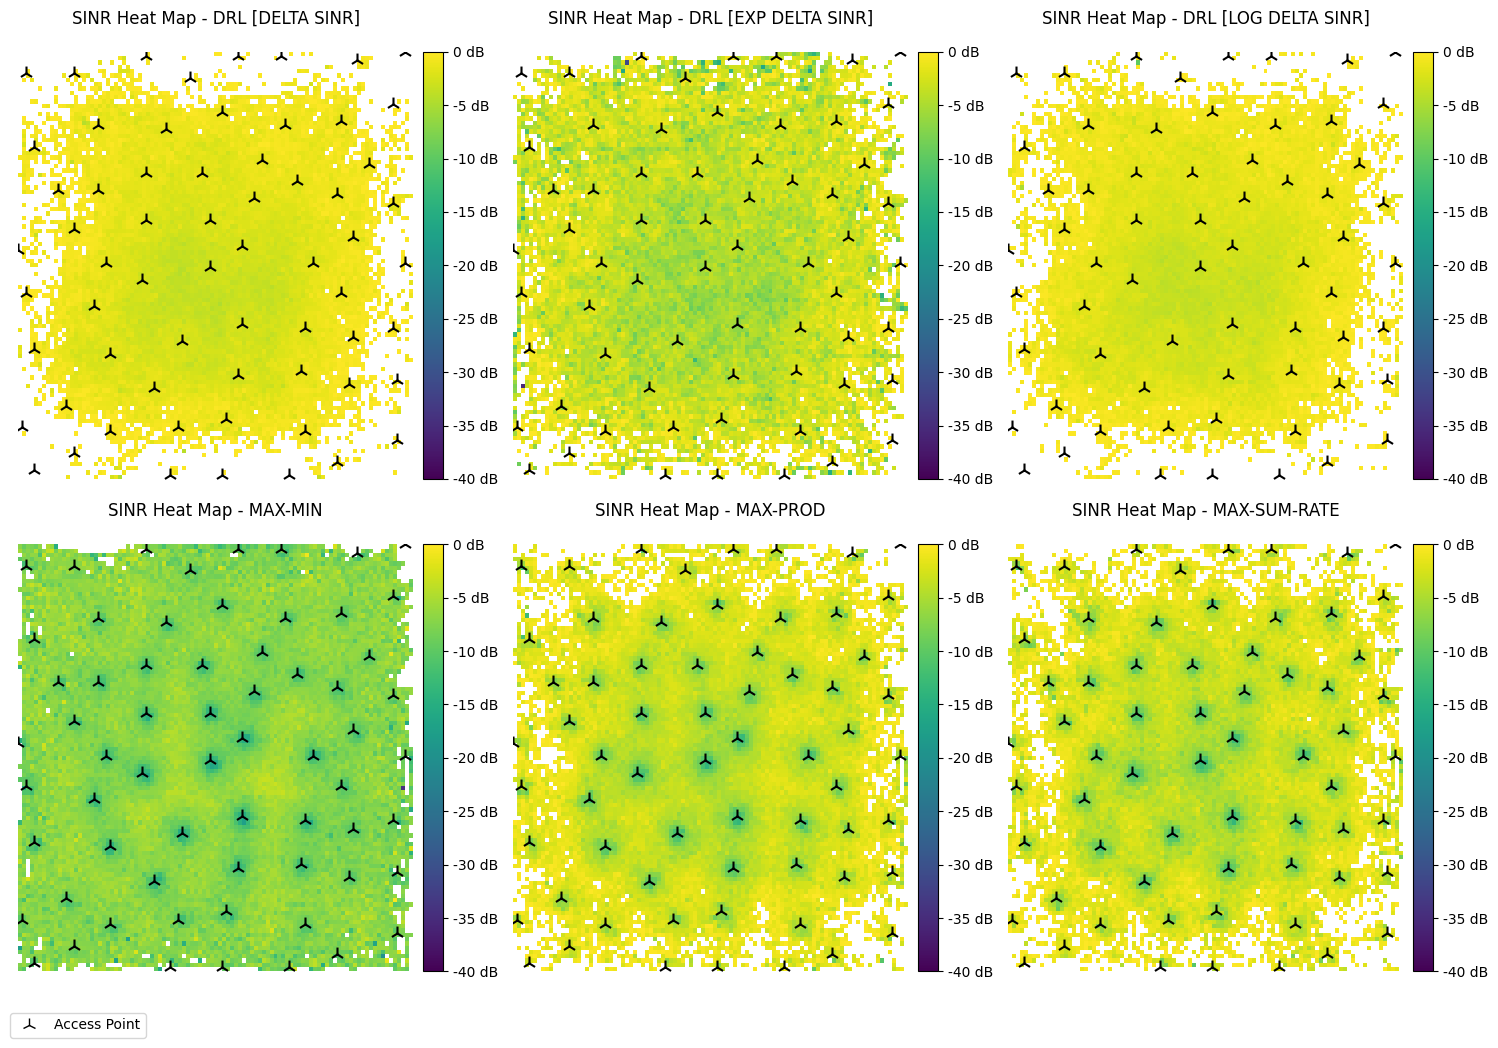

In [38]:
sinr_dataframes = {
    'DRL [DELTA SINR]': MODEL_DELTA_SINR_SINRs,
    'DRL [EXP DELTA SINR]':MODEL_EXP_DELTA_CLIP_SINR_SINRs,
    'DRL [LOG DELTA SINR]': MODEL_LOG_DELTA_SINR_SINRs,
    'MAX-MIN': MAXMIN_SINRs,
    'MAX-PROD': MAXPROD_SINRs,
    'MAX-SUM-RATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, filter_min=vmin, filter_max=vmax, grid_size=grid_size, rounding_precision=0, colorbar_ticks=colorbar_ticks)

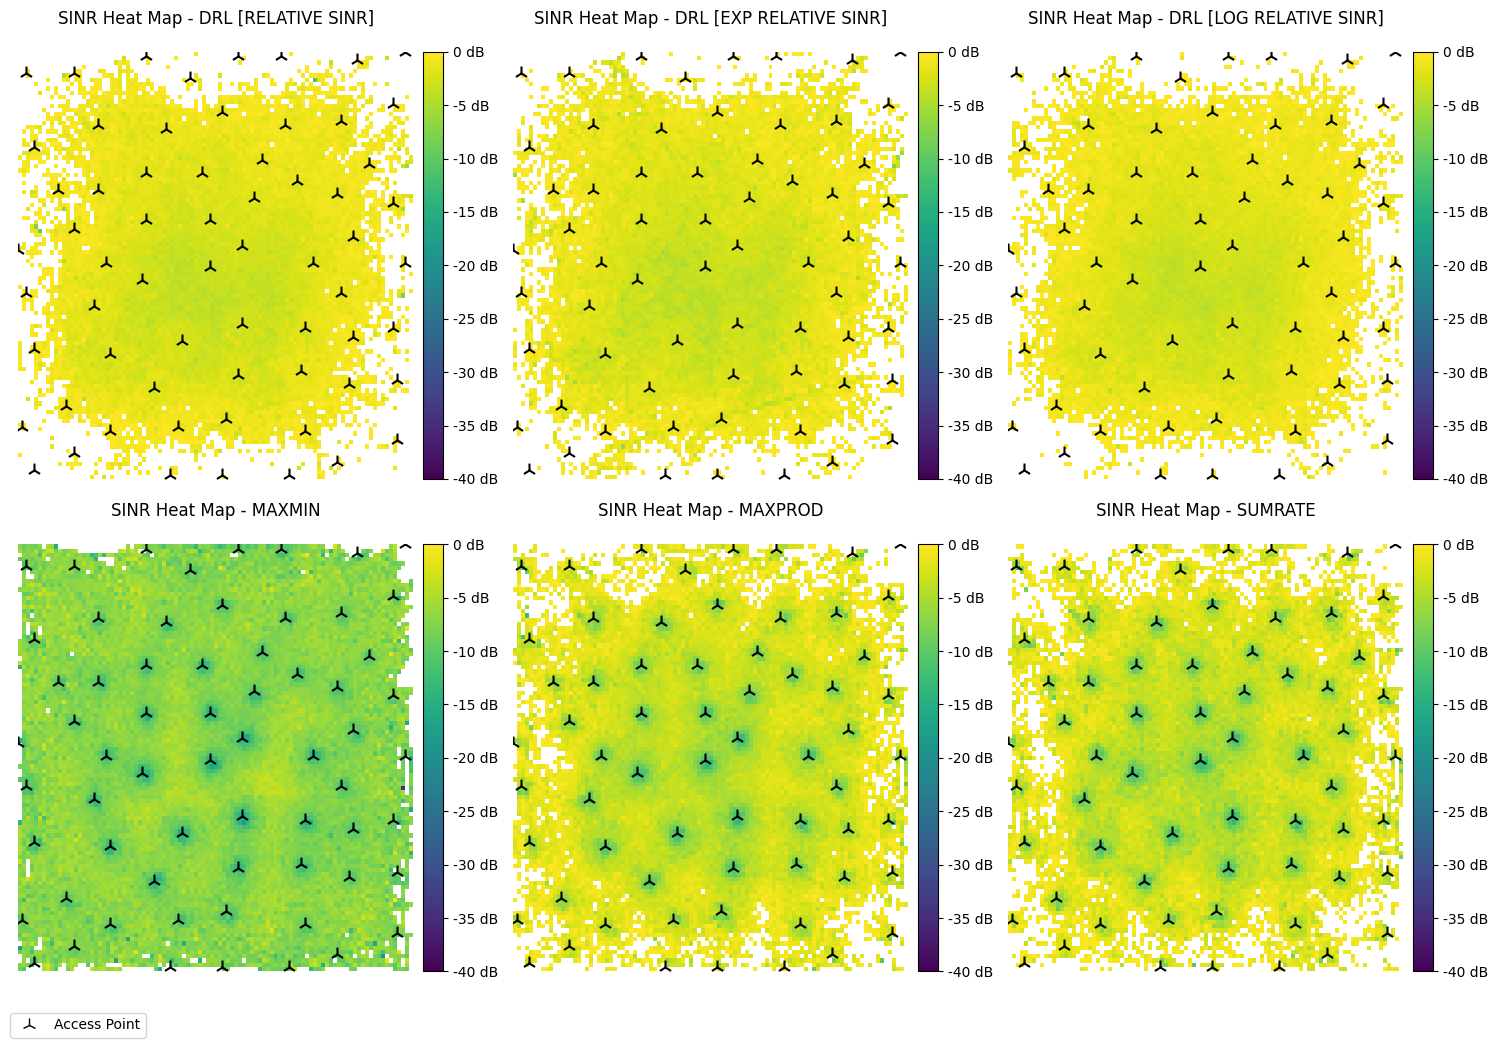

In [39]:
sinr_dataframes = {
    'DRL [RELATIVE SINR]': MODEL_RELATIVE_SINR_SINRs, 
    'DRL [EXP RELATIVE SINR]':MODEL_EXP_RELATIVE_CLIP_SINR_SINRs, 
    'DRL [LOG RELATIVE SINR]': MODEL_LOG_RELATIVE_SINR_SINRs,
    'MAXMIN': MAXMIN_SINRs,
    'MAXPROD': MAXPROD_SINRs,
    'SUMRATE': SUMRATE_SINRs
}

plot_sinr_heatmaps(sinr_dataframes, UEs_LOCATIONS, APs_LOCATIONS, vmin, vmax, filter_min=vmin, filter_max=vmax, grid_size=grid_size, rounding_precision=0, colorbar_ticks=colorbar_ticks)

# Computational Time

In [40]:
# load data from csv files
MODEL_DELTA_SINR_DURATIONs                = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_DELTA_SINR_DURATIONs.csv', index_col=0)
MODEL_EXP_DELTA_CLIP_SINR_DURATIONs       = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_DELTA_CLIP_SINR_DURATIONs.csv', index_col=0)
MODEL_LOG_DELTA_SINR_DURATIONs            = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_DELTA_SINR_DURATIONs.csv', index_col=0)
MODEL_RELATIVE_SINR_DURATIONs             = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_RELATIVE_SINR_DURATIONs.csv', index_col=0)
MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs    = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs.csv', index_col=0)
MODEL_LOG_RELATIVE_SINR_DURATIONs         = pd.read_csv(f'{results_dir}/{results_folder}/MODEL_LOG_RELATIVE_SINR_DURATIONs.csv', index_col=0)

MAXMIN_DURATIONs  =  pd.read_csv(f'{results_dir}/{results_folder}/MAXMIN_DURATIONs.csv', index_col=0)
MAXPROD_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/MAXPROD_DURATIONs.csv', index_col=0)
SUMRATE_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/SUMRATE_DURATIONs.csv', index_col=0)

In [41]:
DURATION_DATA = {
    'MODEL_DELTA_SINR_DURATIONs':               {'label': 'DRL [DELTA SINR]',           'data': MODEL_DELTA_SINR_DURATIONs},
    'MODEL_EXP_DELTA_CLIP_SINR_DURATIONs':      {'label': 'DRL [EXP DELTA SINR]',       'data': MODEL_EXP_DELTA_CLIP_SINR_DURATIONs},
    'MODEL_LOG_DELTA_SINR_DURATIONs':           {'label': 'DRL [LOG DELTA SINR]',       'data': MODEL_LOG_DELTA_SINR_DURATIONs},
    'MODEL_RELATIVE_SINR_DURATIONs':            {'label': 'DRL [RELATIVE SINR]',        'data': MODEL_RELATIVE_SINR_DURATIONs},
    'MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs':   {'label': 'DRL [EXP RELATIVE SINR]',    'data': MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs},
    'MODEL_LOG_RELATIVE_SINR_DURATIONs':        {'label': 'DRL [LOG RELATIVE SINR]',    'data': MODEL_LOG_RELATIVE_SINR_DURATIONs},
    'MAXMIN_DURATIONs':                         {'label': 'MAX-MIN',                    'data': MAXMIN_DURATIONs},
    'MAXPROD_DURATIONs':                        {'label': 'MAX-PROD',                   'data': MAXPROD_DURATIONs},
    'SUMRATE_DURATIONs':                        {'label': 'MAX-SUM-RATE',               'data': SUMRATE_DURATIONs},
}

In [42]:
duration_benchmarking(DURATION_DATA)

,Model,Mean Duration,Median Duration,Standard Deviation,Max Duration,Min Duration
0,DRL [DELTA SINR],0.000210,0.000199,0.000034,0.000348,0.000156
1,DRL [EXP DELTA SINR],0.000198,0.000185,0.000048,0.000424,0.000152
2,DRL [LOG DELTA SINR],0.000188,0.000179,0.000034,0.000315,0.000145
3,DRL [RELATIVE SINR],0.000182,0.000175,0.000032,0.000334,0.000144
4,DRL [EXP RELATIVE SINR],0.000192,0.000181,0.000037,0.000373,0.000146
5,DRL [LOG RELATIVE SINR],0.000209,0.000201,0.000037,0.000410,0.000169
6,MAX-MIN,0.298062,0.300727,0.052475,0.427013,0.135599
7,MAX-PROD,0.058537,0.052742,0.029409,0.121928,0.012742
8,MAX-SUM-RATE,0.060590,0.051965,0.034649,0.136080,0.012107


# Compare SAC with DDPG

In [43]:
# Results location
results_dir = 'RESULTS'
results_folder = 'MODELS_COMPARISON'

SAC_DELTA_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SAC_DELTA_SINR_SEs.csv', index_col=0)
SAC_EXP_DELTA_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SAC_EXP_DELTA_CLIP_SINR_SEs.csv', index_col=0)
SAC_LOG_DELTA_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SAC_LOG_DELTA_SINR_SEs.csv', index_col=0)
SAC_RELATIVE_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SAC_RELATIVE_SINR_SEs.csv', index_col=0)
SAC_EXP_RELATIVE_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SAC_EXP_RELATIVE_CLIP_SINR_SEs.csv', index_col=0)
SAC_LOG_RELATIVE_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/SAC_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

DDPG_DELTA_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/DDPG_DELTA_SINR_SEs.csv', index_col=0)
DDPG_EXP_DELTA_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/DDPG_EXP_DELTA_SINR_SEs.csv', index_col=0)
DDPG_LOG_DELTA_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/DDPG_LOG_DELTA_SINR_SEs.csv', index_col=0)
DDPG_RELATIVE_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/DDPG_RELATIVE_SINR_SEs.csv', index_col=0)
DDPG_LOG_RELATIVE_SINR_SEs = pd.read_csv(f'{results_dir}/{results_folder}/DDPG_LOG_RELATIVE_SINR_SEs.csv', index_col=0)

In [44]:
SE_DATA_R_SINR = {
    'SAC_DELTA_SINR_SEs':           {'label': 'SAC [DELTA SINR]',           'data': SAC_DELTA_SINR_SEs,         'color': 'green',   'linestyle': '-',  'linewidth': 1},
    'SAC_LOG_RELATIVE_SINR_SEs':    {'label': 'SAC [LOG RELATIVE SINR]',    'data': SAC_LOG_RELATIVE_SINR_SEs,  'color': 'black',   'linestyle': '-',  'linewidth': 1},
    
    'DDPG_DELTA_SINR_SEs':          {'label': 'DDPG [DELTA SINR]',          'data': DDPG_DELTA_SINR_SEs,        'color': 'green',   'linestyle': '-.',  'linewidth': 1},
    'DDPG_LOG_RELATIVE_SINR_SEs':   {'label': 'DDPG [LOG RELATIVE SINR]',   'data': DDPG_LOG_RELATIVE_SINR_SEs, 'color': 'black',   'linestyle': '-.',  'linewidth': 1},
}

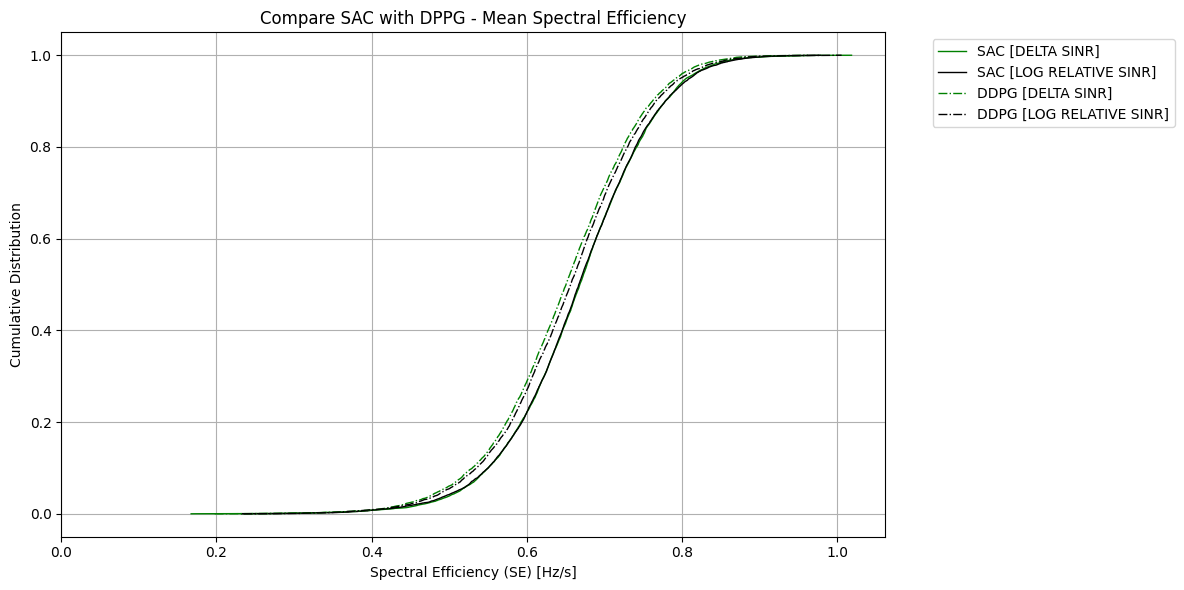

In [45]:
operation = 'mean'
plot_cdf_pdf(data=SE_DATA_R_SINR, title=f'Compare SAC with DPPG - {operation.title()} Spectral Efficiency', xlabel='Spectral Efficiency (SE) [Hz/s]', operation=operation, cumulative=True, save_plt=False, save_path='figures', xmin=0)

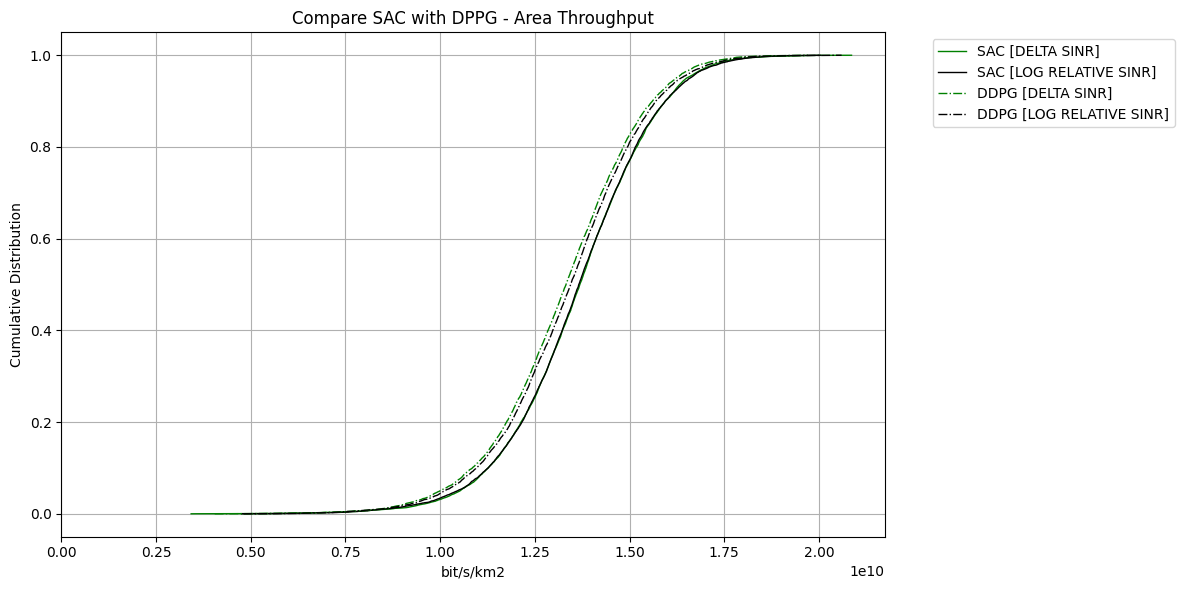

In [46]:
SAC_DELTA_SINR_ATHP           = calculate_area_throughput(SAC_DELTA_SINR_SEs            , bandwidth, square_length, 'numpy')
SAC_LOG_RELATIVE_SINR_ATHP    = calculate_area_throughput(SAC_LOG_RELATIVE_SINR_SEs     , bandwidth, square_length, 'numpy')
DDPG_DELTA_SINR_ATHP          = calculate_area_throughput(DDPG_DELTA_SINR_SEs           , bandwidth, square_length, 'numpy')
DDPG_LOG_RELATIVE_SINR_ATHP   = calculate_area_throughput(DDPG_LOG_RELATIVE_SINR_SEs    , bandwidth, square_length, 'numpy')

ATHP_DATA_R_SINR = {
    'SAC_DELTA_SINR_ATHP':         {'label': 'SAC [DELTA SINR]',         'data': SAC_DELTA_SINR_ATHP,         'color': 'green',  'linestyle': '-',   'linewidth': 1},
    'SAC_LOG_RELATIVE_SINR_ATHP':  {'label': 'SAC [LOG RELATIVE SINR]',  'data': SAC_LOG_RELATIVE_SINR_ATHP,  'color': 'black',  'linestyle': '-',   'linewidth': 1},
    'DDPG_DELTA_SINR_ATHP':        {'label': 'DDPG [DELTA SINR]',        'data': DDPG_DELTA_SINR_ATHP,        'color': 'green',  'linestyle': '-.',  'linewidth': 1},
    'DDPG_LOG_RELATIVE_SINR_ATHP': {'label': 'DDPG [LOG RELATIVE SINR]', 'data': DDPG_LOG_RELATIVE_SINR_ATHP, 'color': 'black',  'linestyle': '-.',  'linewidth': 1},
}

plot_cdf_pdf(data=ATHP_DATA_R_SINR, title='Compare SAC with DPPG - Area Throughput', xlabel='bit/s/km2', operation=None, cumulative=True, save_plt=False, save_path='figures', xmin=0)

In [47]:
calculate_and_rank_percentiles(SE_DATA_R_SINR, [100], operation='mean')

,Model,100th Percentile,Rank
0,SAC [DELTA SINR],1.018540,1
3,DDPG [LOG RELATIVE SINR],1.005721,2
1,SAC [LOG RELATIVE SINR],0.978570,3
2,DDPG [DELTA SINR],0.962427,4


In [48]:
results_dir = "RESULTS"
results_folder = 'MODELS_COMPARISON'

SAC_DELTA_SINR_DURATIONs         = pd.read_csv(f'{results_dir}/{results_folder}/SAC_DELTA_SINR_DURATIONs.csv', index_col=0)
SAC_LOG_RELATIVE_SINR_DURATIONs  = pd.read_csv(f'{results_dir}/{results_folder}/SAC_LOG_RELATIVE_SINR_DURATIONs.csv', index_col=0)

DDPG_DELTA_SINR_DURATIONs        = pd.read_csv(f'{results_dir}/{results_folder}/DDPG_DELTA_SINR_DURATIONs.csv', index_col=0)
DDPG_LOG_RELATIVE_SINR_DURATIONs = pd.read_csv(f'{results_dir}/{results_folder}/DDPG_LOG_RELATIVE_SINR_DURATIONs.csv', index_col=0)

In [49]:
DURATION_DATA = {
    'MODEL_DELTA_SINR_DURATIONs':             {'label': 'SAC [DELTA SINR]',         'data': SAC_DELTA_SINR_DURATIONs},
    'MODEL_EXP_DELTA_CLIP_SINR_DURATIONs':    {'label': 'SAC [LOG RELATIVE SINR]',  'data': SAC_LOG_RELATIVE_SINR_DURATIONs},

    'MODEL_RELATIVE_SINR_DURATIONs':          {'label': 'DDPG [DELTA SINR]',        'data': DDPG_DELTA_SINR_DURATIONs},
    'MODEL_EXP_RELATIVE_CLIP_SINR_DURATIONs': {'label': 'DDPG [LOG RELATIVE SINR]', 'data': DDPG_LOG_RELATIVE_SINR_DURATIONs},
}

In [50]:
duration_benchmarking(DURATION_DATA)

,Model,Mean Duration,Median Duration,Standard Deviation,Max Duration,Min Duration
0,SAC [DELTA SINR],0.000369,0.000339,0.000189,0.001830,0.000327
1,SAC [LOG RELATIVE SINR],0.000296,0.000298,0.000037,0.000496,0.000199
2,DDPG [DELTA SINR],0.000184,0.000176,0.000033,0.000383,0.000144
3,DDPG [LOG RELATIVE SINR],0.000143,0.000135,0.000041,0.000503,0.000113
